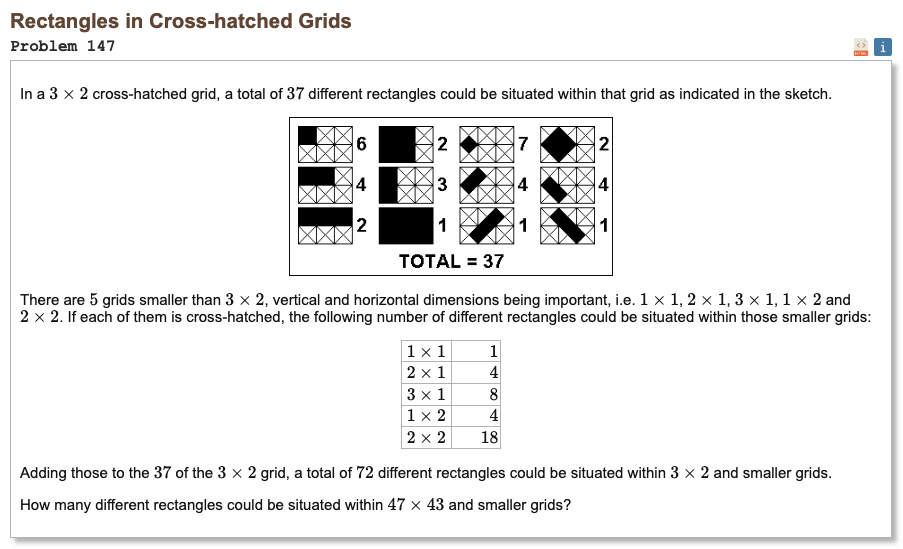

## Initial approach

* count rectangles in an a by b grid with both normal and 45 degree sides
* normal rectangles are easy using choose formula for vertical and horizontal lines
* tilted rectangles come from picking two y=x+c lines and two y=-x+d lines that all fit inside the outer box
* instead of four nested loops we turn the inner two into a math sum so each a,b pair is O(1)
* we derive tight bounds on c and d so every chosen pair gives a valid diamond fully inside
* we verify the fast counter by brute force on tiny grids to be safe
* then sum results over all grid sizes up to 47 by 43 treating width and height as ordered
* no external libraries used, just basic math

In [1]:
def axis_aligned(m, n):
    return (m * (m + 1) // 2) * (n * (n + 1) // 2)

def diagonal_rectangles(m, n):
    total = 0
    for a in range(-m, n):
        for b in range(a + 1, n + 1):
            c_low = max(b, -a)
            c_high = min(2 * m + a, 2 * n - b)
            d_low_base = max(a, -b)
            d_high = min(2 * m + b, 2 * n - a)
            if c_low > c_high or d_low_base > d_high:
                continue
            t = d_low_base - 1
            c1 = c_low
            c2 = c_high
            L1_left = c1
            L1_right = min(c2, t)
            if L1_right >= L1_left:
                L1 = L1_right - L1_left + 1
                add1 = d_high - d_low_base + 1
                if add1 > 0:
                    total += L1 * add1
            cA = max(c1, t + 1)
            cB = min(c2, d_high - 1)
            if cB >= cA:
                k = cB - cA + 1
                s_c = (cA + cB) * k // 2
                total += k * d_high - s_c
    return total

def total_rectangles_upto(M, N):
    s = 0
    for m in range(1, M + 1):
        for n in range(1, N + 1):
            s += axis_aligned(m, n) + diagonal_rectangles(m, n)
    return s

def brute_diagonal(m, n):
    total = 0
    for a in range(-m, n + 1):
        for b in range(a + 1, n + 1):
            for c in range(0, m + n + 1):
                for d in range(c + 1, m + n + 1):
                    x1 = (c - a) / 2
                    y1 = (c + a) / 2
                    x2 = (d - a) / 2
                    y2 = (d + a) / 2
                    x3 = (c - b) / 2
                    y3 = (c + b) / 2
                    x4 = (d - b) / 2
                    y4 = (d + b) / 2
                    if 0 <= x1 <= m and 0 <= x2 <= m and 0 <= x3 <= m and 0 <= x4 <= m and 0 <= y1 <= n and 0 <= y2 <= n and 0 <= y3 <= n and 0 <= y4 <= n:
                        total += 1
    return total

In [2]:
%%time
for mm in range(1, 5):
    for nn in range(1, 5):
        fast = diagonal_rectangles(mm, nn)
        slow = brute_diagonal(mm, nn)
        if fast != slow:
            print(f"Mismatch at {mm}x{nn}: fast={fast}, slow={slow}")

result = total_rectangles_upto(47, 43)
print("Result:", result)

Mismatch at 1x1: fast=4, slow=0
Mismatch at 1x2: fast=9, slow=1
Mismatch at 1x3: fast=14, slow=2
Mismatch at 1x4: fast=19, slow=3
Mismatch at 2x1: fast=9, slow=1
Mismatch at 2x2: fast=37, slow=9
Mismatch at 2x3: fast=67, slow=19
Mismatch at 2x4: fast=97, slow=29
Mismatch at 3x1: fast=14, slow=2
Mismatch at 3x2: fast=67, slow=19
Mismatch at 3x3: fast=155, slow=51
Mismatch at 3x4: fast=246, slow=86
Mismatch at 4x1: fast=19, slow=3
Mismatch at 4x2: fast=97, slow=29
Mismatch at 4x3: fast=246, slow=86
Mismatch at 4x4: fast=446, slow=166
Result: 1472587116
CPU times: user 1.53 s, sys: 15.7 ms, total: 1.54 s
Wall time: 1.55 s
